In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(font_scale=1.25)
plt.style.use('ggplot')

In [2]:
file = 'Game_Sales_Clean.csv'
file_pd = pd.read_csv(file, index_col = 0)
file_pd.Year_of_Release = file_pd.Year_of_Release.astype(np.int64)
file_pd.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


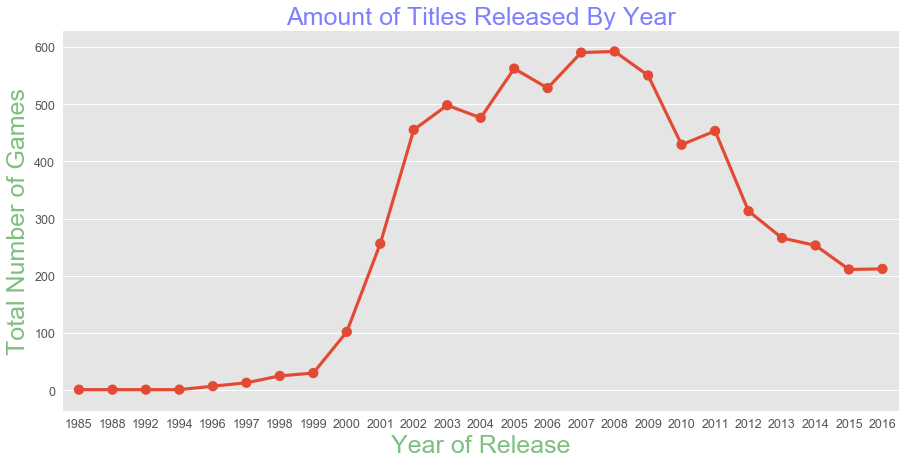

In [3]:
#Number of Titles Released by Year
titles_by_year = file_pd.groupby(["Year_of_Release"]).count()["Name"]
titles_by_year

plt.subplots(figsize=(15,7))
ax = sns.pointplot(x = titles_by_year.index, y = titles_by_year)
ax.set_title('Amount of Titles Released By Year', color= 'blue', size=25, alpha=0.5)
ax.set_xlabel('Year of Release', color='green', size=25, alpha=0.5)
ax.set_ylabel('Total Number of Games', color='green', size=25, alpha=0.5)
plt.savefig("Images/Amount of Titles Released By Year.png")

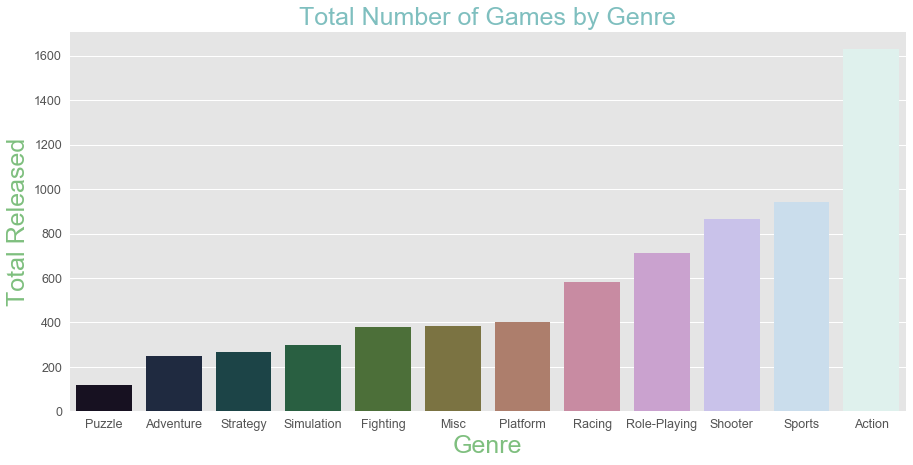

In [4]:
#Number of games by genres
games_by_genre = file_pd.groupby(["Genre"]).count()["Name"].sort_values()
games_by_genre

plt.subplots(figsize=(15,7))
ax = sns.barplot(x= games_by_genre.index , y= games_by_genre, palette='cubehelix')
ax.set_title('Total Number of Games by Genre', color='Teal', alpha=0.5, size=25)
ax.set_xlabel('Genre', color='green', alpha=0.5, size=25)
ax.set_ylabel('Total Released', color='green', alpha=0.5, size=25)
plt.savefig("Images/Total Number of Games by Genre.png")


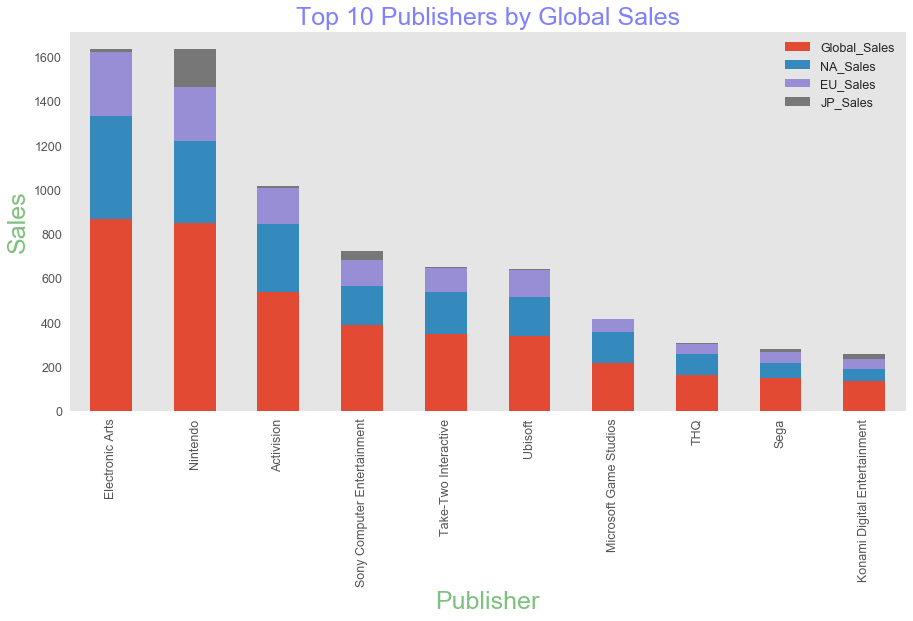

In [5]:
global_sales_publisher = file_pd.pivot_table(index=['Publisher'], values=['Global_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)

global_sales_publisher = global_sales_publisher[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']]

ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False, figsize=(15,7))
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)
plt.savefig("Images/Top 10 Publishers by Global Sales.png")


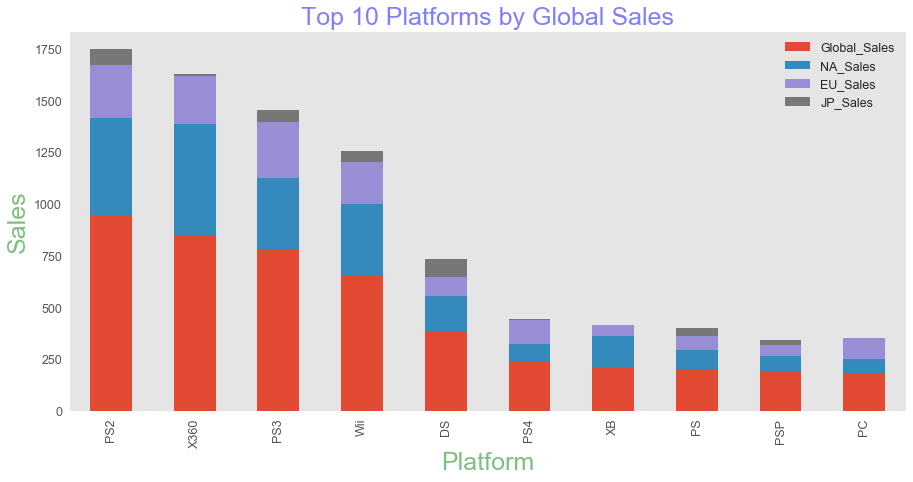

In [6]:
global_sales_platform = file_pd.pivot_table(index=['Platform'], values=['Global_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)

global_sales_platform = global_sales_platform[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']]

ax = global_sales_platform.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False, figsize=(15,7))
ax.set_title('Top 10 Platforms by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Platform', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

plt.savefig("Images/Top 10 Platforms by Global Sales.png")


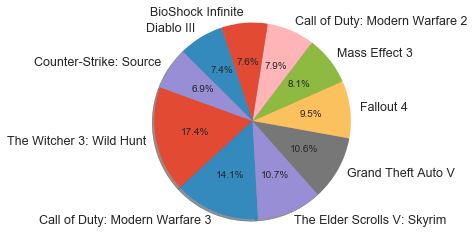

In [7]:
genre_user_ratings = file_pd.groupby(["Name"])["User_Count"].sum().reset_index()
genre_user_ratings = genre_user_ratings.sort_values("User_Count" , ascending = False).head(10)
genre_df = pd.DataFrame(genre_user_ratings)
genre_df

labels = []
for x in genre_df["Name"]:
    labels.append(x)
    
figsize=(15,10)

plt.pie(genre_df["User_Count"], labels=labels, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

plt.savefig("Images/Top 10 Games by User Count.png")



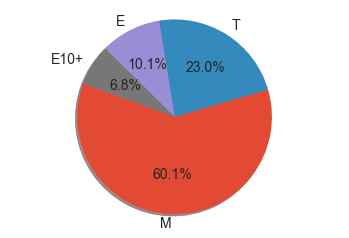

In [8]:
top_ratings = file_pd.groupby(["Rating"])["User_Count"].sum().reset_index()
top_ratings = top_ratings.sort_values("User_Count" , ascending = False).head(4)
rating_df = pd.DataFrame(top_ratings)
rating_df

labels = []
for x in rating_df["Rating"]:
    labels.append(x)
    
plt.pie(rating_df["User_Count"], labels=labels, autopct="%1.1f%%", shadow=True, startangle=160, 
        textprops={'fontsize': 14})
plt.axis("equal")

plt.savefig("Images/Top Ratings by User Count.png")


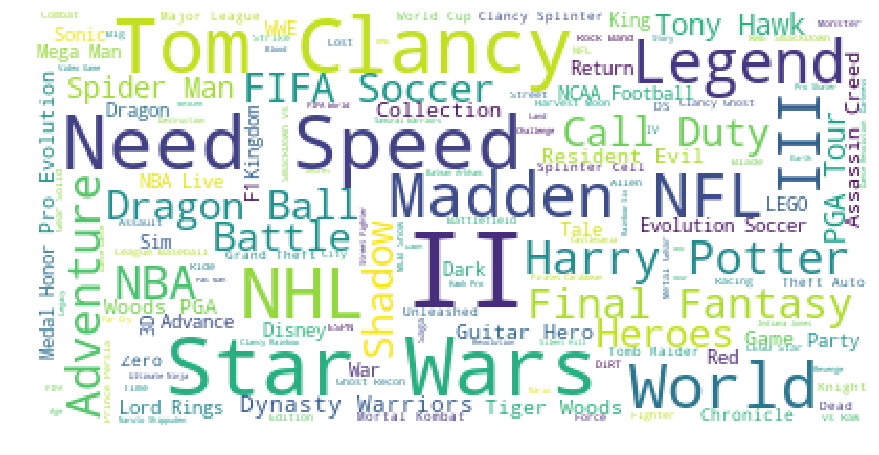

In [9]:
import nltk
#nltk.download('popular')

t = file_pd.Name.apply(nltk.word_tokenize).sum()

from collections import Counter
from string import punctuation

def content_text(text):
   stopwords = set(nltk.corpus.stopwords.words('english'))
   without_stp  = Counter()
   for word in text:
       word = word.lower()
       if len(word) < 3:
           continue
       if word not in stopwords:
           without_stp.update([word])
   return [(y,c) for y,c in without_stp.most_common(10)]

without_stop = content_text(t)
without_stop

from PIL import Image
import random
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(t)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', max_font_size=50, stopwords=stopwords,
                     random_state=3, relative_scaling=.5).generate(text)
plt.figure(figsize=(15,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("Images/Wordcloud Map.png")